In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix  
from IPython.display import Image
import pydotplus
import graphviz
import os
import warnings
import random
warnings.filterwarnings('ignore')

In [2]:
os.chdir('C:\\Users\\liuth\Documents\\Python Scripts\\ThinkfulProjects\Data')

In [3]:
df = pd.read_csv('apft.csv')

---

Data Exploration and Visualization

In [4]:
df.head(5)

,CLASS,RN,SEX,AGE,RAW-PU,SCORE-PU,RAW-SU,SCORE-SU,TIME,SCORE-RU,SCORE,RESULT
0,12,101,M,19,64.0,90.0,67.0,82.0,1320,94,266,PASS
1,12,105,M,20,60.0,85.0,61.0,73.0,1525,66,224,PASS
2,12,106,M,20,64.0,90.0,55.0,63.0,1507,71,224,PASS
3,12,115,M,18,48.0,68.0,68.0,84.0,1518,68,220,PASS
4,12,116,M,23,70.0,94.0,55.0,67.0,1331,93,254,PASS


In [5]:
#Creating binary Results
df['RESULTBINARY'] = df['RESULT'].map(lambda i:1 if i == 'PASS' else 0)
df['SEXBINARY'] = df['SEX'].map(lambda i:1 if i == 'M' else 0)

In [6]:
df = df.fillna(0)

In [57]:
#Size of Sexbinary
female = df['SEXBINARY'].isin(['0'])
male = df['SEXBINARY'].isin(['1']) 
len(df.loc[female])

54

In [56]:
len(df.loc[male])

340

In [58]:
df['SEXBINARY'].shape

(394,)

In [7]:
df.dtypes

CLASS             int64
RN                int64
SEX              object
AGE               int64
RAW-PU          float64
SCORE-PU        float64
RAW-SU          float64
SCORE-SU        float64
TIME             object
SCORE-RU          int64
SCORE             int64
RESULT           object
RESULTBINARY      int64
SEXBINARY         int64
dtype: object

In [8]:
#changing variables into objects
df['CLASS'] = df['CLASS'].astype(int).astype(object)
df['RN'] = df['RN'].astype(int).astype(object)

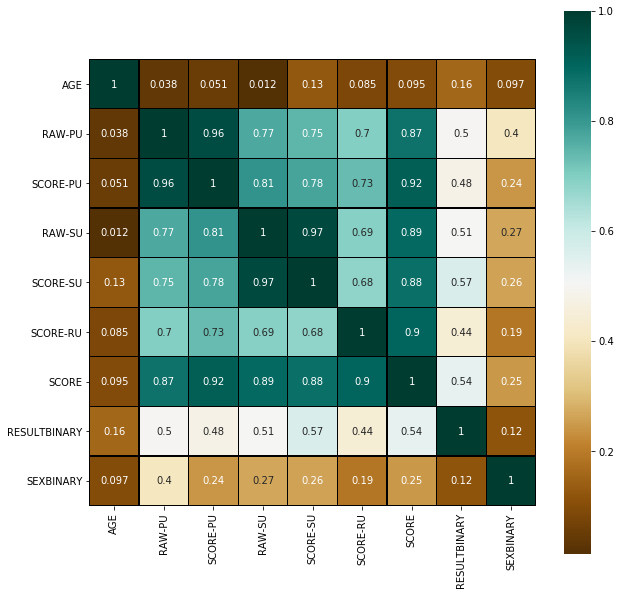

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, square=True, cmap = "BrBG", linecolor='black', annot=True, ax=ax)

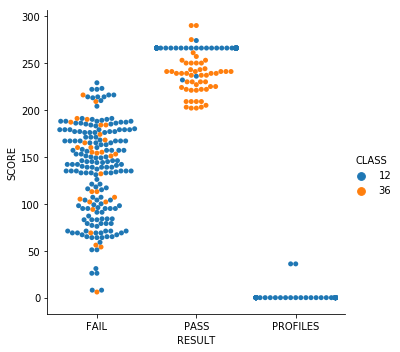

In [10]:
sns.catplot(data=df.loc[df['SCORE']]\
                               , x='RESULT', y='SCORE', hue='CLASS',
                               kind='swarm')

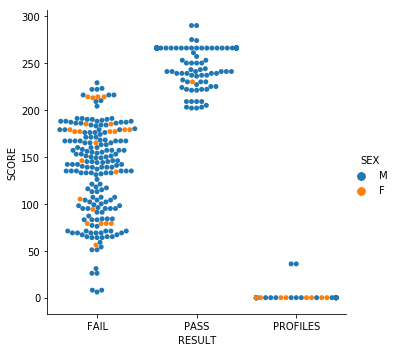

In [11]:
sns.catplot(data=df.loc[df['SCORE']]\
                               , x='RESULT', y='SCORE', hue='SEX',
                               kind='swarm')

In [12]:
#Class Imbalance, perhaps deal with it if exploring as a independent variable (SEX)

---

Verifying the 4 Assumptions for Linear Regression

In [13]:
#im=smf.ols(formula='RESULTBINARY~SCORE+SEXBINARY+SCORE-RU+SCORE-PU+SCORE-SU', data=df).fit()
im=smf.ols(formula='SCORE~SCORE-RU+SCORE-PU+SCORE-SU', data=df).fit()
#PCA the regression to fix the overfitting issue with the R^2

In [14]:
im.params
im.pvalues
im.rsquared
im.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SCORE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.162e+36
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:13:41   Log-Likelihood:                 13137.
No. Observations:                 394   AIC:                        -2.627e+04
Df Residuals:                     392   BIC:                        -2.626e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.776e-15   7.41e-17     23.963      0.000    1.63e-15    1.92e-15
SCORE          1.0000    4.9e-19   2.04e+18      0.000       1.000       1.000
==============================================================================
Omnibus:                       85.660   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.669
Skew:                          -1.476   Prob(JB):                     6.35e-32
Kurtosis:                       3.180   Cond. No.                         277.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

Visiting this through Logistics Regression

In [15]:
lr = LogisticRegression()

In [16]:
df.head(5)

,CLASS,RN,SEX,AGE,RAW-PU,SCORE-PU,RAW-SU,SCORE-SU,TIME,SCORE-RU,SCORE,RESULT,RESULTBINARY,SEXBINARY
0,12,101,M,19,64.0,90.0,67.0,82.0,1320,94,266,PASS,1,1
1,12,105,M,20,60.0,85.0,61.0,73.0,1525,66,224,PASS,1,1
2,12,106,M,20,64.0,90.0,55.0,63.0,1507,71,224,PASS,1,1
3,12,115,M,18,48.0,68.0,68.0,84.0,1518,68,220,PASS,1,1
4,12,116,M,23,70.0,94.0,55.0,67.0,1331,93,254,PASS,1,1


In [17]:
df2 = pd.DataFrame()

In [18]:
df2['RESULTBINARY'] = df['RESULTBINARY']
df2['SEXBINARY'] = df['SEXBINARY']
df2['SCORE-PU'] = df['SCORE-PU']
df2['SCORE-SU'] = df['SCORE-SU']
df2['SCORE-RU'] = df['SCORE-RU']
df2['SCORE'] = df['SCORE']

df2.shape

(394, 6)

In [20]:
#Create Training and Test set
dfran = np.random.rand(len(df2)) < 0.8

dftrain = df[dfran]

dftest = df[~dfran]

In [21]:
dftrain.shape

(306, 14)

In [22]:
dftest.shape

(88, 14)

In [94]:
#Downsample Testing
# Separate the majority and minority Class.
df_maj = df[df2.SEXBINARY==1]
df_min = df[df2.SEXBINARY==0]

# Downsample majority class 
df_maj_downsampled = resample(df_maj,
                                    replace=True,
                                    n_samples=len(df_min),
                                    random_state=123)
                               
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_maj_downsampled, df_min])

df_downsampled.shape

(108, 14)

In [61]:
X = dftrain[['RESULTBINARY','SCORE','SCORE-PU', 'SCORE-SU', 'SCORE-RU']] #justify the independent variables
Y = dftrain['SEXBINARY'] #discrete variable, changed to gender to see the possibilities of passing the initial APFT

# Use GS-CV to see which alpha level is best.
parameters = {
             'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

lr_grid = GridSearchCV(lr, parameters, cv=5, verbose=1) 

#Fit the logistic regression 
lr_grid.fit(X, Y)

#return best parameters and best score
print('Best parameters:')
print(lr_grid.best_params_)
print('Best Score:')
print(lr_grid.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:
{'C': 1e-05}
Best Score:
0.8758169934640523


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.2s finished


In [63]:
Xtest = dftest[['RESULTBINARY','SCORE','SCORE-PU', 'SCORE-SU', 'SCORE-RU']] #justify the independent variables
Ytest = dftest['SEXBINARY'] #discrete variable, changed to gender to see the possibilities of passing the initial APFT

# Use GS-CV to see which alpha level is best.
parameters = {
             'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

lr_grid = GridSearchCV(lr, parameters, cv=5, verbose=1) 

#Fit the logistic regression 
lr_grid.fit(Xtest, Ytest)

#return best parameters and best score
print('Best parameters:')
print(lr_grid.best_params_)
print('Best Score:')
print(lr_grid.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:
{'C': 1e-05}
Best Score:
0.8181818181818182


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.2s finished


In [95]:
X = df_downsampled[['RESULTBINARY','SCORE','SCORE-PU', 'SCORE-SU', 'SCORE-RU']] #justify the independent variables
Y = df_downsampled['SEXBINARY'] #discrete variable, changed to gender to see the possibilities of passing the initial APFT

# Use GS-CV to see which alpha level is best.
parameters = {
             'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

lr_grid = GridSearchCV(lr, parameters, cv=5, verbose=1)

#Fit the logistic regression 
lr_grid.fit(X, Y)

#return best parameters and best score
print('Best parameters:')
print(lr_grid.best_params_)
print('Best Score:')
print(lr_grid.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:
{'C': 1e-05}
Best Score:
0.6388888888888888


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


In [70]:
lr = LogisticRegression(C=1e-05)

# Fit the model.
fit = lr.fit(X, Y)
fit2 = lr.fit(Xtest, Ytest)

# Display.
print('Coefficients Train')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn2 = lr.fit(X, Y) #done for estimation

print('Coefficients Test')
print(fit2.coef_)
print(fit2.intercept_)
pred_y_sklearn = lr.predict(Xtest) #predict what is going on for the estimation

print('\n Accuracy of PASS status')
print(pd.crosstab(pred_y_sklearn, Ytest))

print('\n Percentage accuracy')
print(lr.score(Xtest, Ytest))

#class imbalance produces high accuracy, revisit after down sampling.

cross_val_score(lr, Xtest, Ytest, cv=5)

Coefficients Train
[[9.16167468e-06 7.43537957e-03 3.03608489e-03 2.15175878e-03
  1.69435306e-03]]
[7.03043084e-05]
Coefficients Test
[[6.66675664e-07 9.51655766e-03 3.68058539e-03 4.47909990e-03
  2.45230323e-03]]
[0.00024842]

 Accuracy of PASS status
SEXBINARY   0   1
row_0            
1          16  72

 Percentage accuracy
0.8181818181818182


array([0.78947368, 0.83333333, 0.82352941, 0.82352941, 0.82352941])

---

Random Forest

In [38]:
#rfc = ensemble.RandomForestClassifier()

# Create rfc parameters for GS-CV
param_grid = {'n_estimators': [10, 25, 50, 75, 100, 200, 500, 1000],
             'max_features': [2, 3, 4, 5],
             'max_depth': [2, 4, 6, 8]} #check bagging and sub-sampling

rfc = ensemble.RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)

# Set up GS-CV 
#Something strange is going on with Grid Search
#grid = GridSearchCV(rfc, param_grid, cv=5, verbose=3, n_jobs=-1)

rfc.fit(X, Y)

print(f'Out-of-bag score estimate: {rfc.oob_score_:.5}')
#print(f'Mean accuracy score: {accuracy:.3}')


# Show the best parameter and best score for unfiltered
#print('Best Parameter for data:', grid.best_params_)
#print('\nBest Score for data:', grid.best_score_)

Out-of-bag score estimate: 0.85787


---

Decision Tree

In [39]:
#dtc = DecisionTreeClassifier(criterion='entropy')

# Set parameters for dtc
dtc_params = [{'max_features': [2, 3, 4, 5],
             'max_depth': [2, 4, 6, 8]}]

# Search for the best paramters. 
#dtc_grid = GridSearchCV(dtc, dtc_params, cv=5, verbose=1, n_jobs=1)
dtc = DecisionTreeClassifier(n_estimators=100, oob_score=True, random_state=123456)

# Fit the grid and obtain results
dtc_grid.fit(X, Y)

# Return best parameters and best score
print('Best parameters:')
print(dtc_grid.best_params_)
print('Best Score:')
print(dtc_grid.best_score_)

NameError: name 'r2_score' is not defined

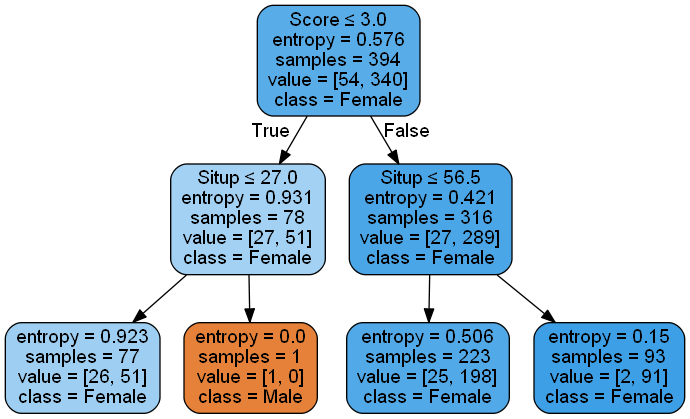

In [29]:
dtc_grid.best_estimator_.fit(X, Y)
dot_data = tree.export_graphviz(dtc_grid.best_estimator_, 
                                class_names=['Male', 'Female'], #Y Columns
                                feature_names=['Result', 'Score', 'Pushup', 'Situp', 'Running'], #X Columns
                                out_file=None, filled=True, 
                                rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())